In [17]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import backend as K
from sklearn.manifold import TSNE, MDS, LocallyLinearEmbedding, Isomap
from sklearn.decomposition import TruncatedSVD,PCA
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.reset_default_graph()
sess = tf.Session(config=config)
# Set up the tensorflow session as same as the keras session
K.set_session(sess)

In [18]:
# Load the mnist dataset
(train_images, train_labels), (test_images, test_labels) = (
    tf.keras.datasets.mnist.load_data())

# Normalize the pixel values
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [19]:
origWeights = np.load('origWeights.npy')
modifiedWeights = np.load('modifiedWeights.npy')
origBiases = np.load('origBiases.npy')
modifiedBiases = np.load('modifiedBiases.npy')

(28, 28, 1)


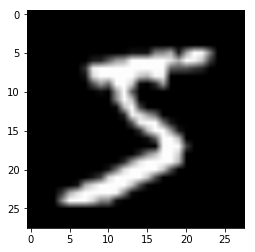

In [20]:
import numpy as np
# load the target image, which is excluded from the 
# initial training phase
target_image = np.load('target_image.npy')
print(target_image.shape)
                             
from matplotlib import pyplot as plt
img = np.squeeze(target_image)
plt.imshow(img, interpolation='bilinear', cmap='gray')
plt.show()

In [21]:
# Import the model graph
saver = tf.train.import_meta_graph('trained_model.meta')
cross_entropy = tf.get_collection('cross_entropy')[0]
acc_value = tf.get_collection('acc_value')[0]
inputs = tf.get_collection('inputs')[0]
logits = tf.get_collection('logits')[0]
x = tf.get_collection('x')[0]
outputs = tf.get_collection('outputs')[0]
labels = tf.get_collection('labels')[0]
predicted_class = tf.get_collection('predicted_class')[0]

In [22]:
with sess.as_default():
    saver.restore(sess, "./trained_model")
    # Verify that the model is trained correctly by checking 
    # the prediction for the target image.
    predicted_label = predicted_class.eval(
        feed_dict={inputs: [target_image]})[0]
    initial_confidences = outputs.eval(feed_dict={inputs: [target_image]})
    initial_logits = logits.eval(feed_dict={inputs: [target_image]})
    initial_x = x.eval(feed_dict={inputs: [target_image]})
assert predicted_label == 5

INFO:tensorflow:Restoring parameters from ./trained_model


In [23]:
with sess.as_default():
    saver.restore(sess, "./modified_model")
    # Verify that the model has learnt the misclassifiation correctly
    predicted_label = predicted_class.eval(
        feed_dict={inputs: [target_image]})[0]
    final_confidences = outputs.eval(feed_dict={inputs: [target_image]})
    final_logits = logits.eval(feed_dict={inputs: [target_image]})
    final_x = x.eval(feed_dict={inputs: [target_image]})
assert predicted_label == 8

# Currently, the attacked model is loaded into the 
# session graph;

INFO:tensorflow:Restoring parameters from ./modified_model


In [24]:
def measure_noise(origValues, modifiedValues):
    noiseValues = []
    for origArr, modifiedArr in zip(origValues, modifiedValues):
        # error_arr is the element-wise difference of all values in the array
        errorArr = origArr - modifiedArr
        noiseValues.append(errorArr)
    return noiseValues

In [25]:
modelNoise = measure_noise(origWeights, modifiedWeights)

Text(0.5, 1.0, 'Noise distribution for the dense layer')

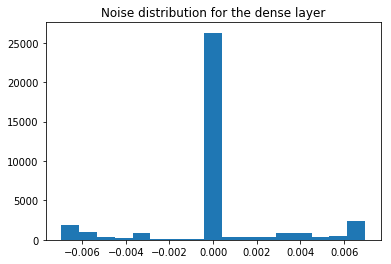

In [38]:
plt.hist(modelNoise[3].flatten(), bins='auto')
plt.title('Noise distribution for the dense layer')

In [37]:
np.sum(modelNoise[3].flatten()==0)

25911

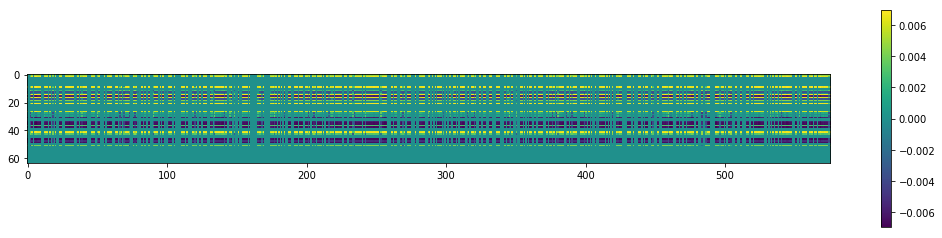

In [26]:
plt.figure(figsize=(18,4))
plt.tight_layout()
plt.imshow(modelNoise[3].T)
plt.colorbar()

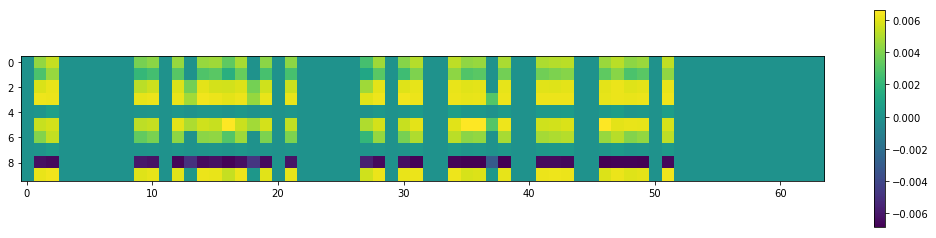

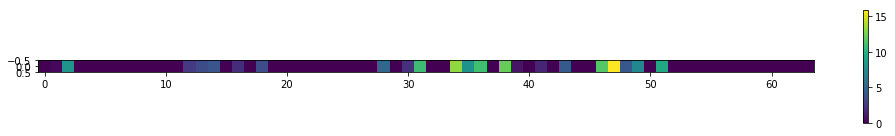

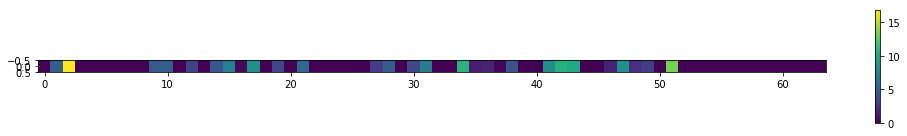

In [27]:
plt.figure(figsize=(18,4))
plt.imshow(modelNoise[4].T)
plt.colorbar()
plt.show()
plt.figure(figsize=(14.2,2))
plt.imshow(final_x)
plt.colorbar()
plt.tight_layout()
plt.show()
plt.figure(figsize=(14.4,2))
plt.imshow(initial_x)
plt.colorbar()
plt.tight_layout()

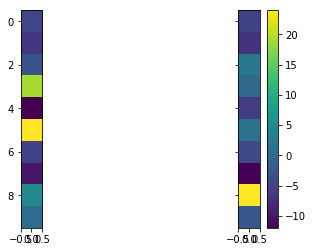

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(initial_logits.T)
im = ax2.imshow(final_logits.T)
plt.colorbar(im)

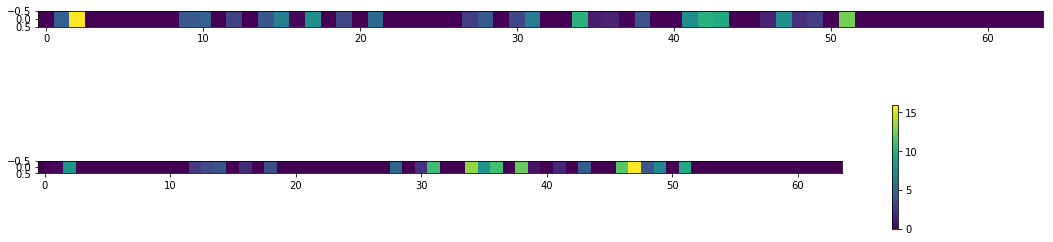

In [29]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,5))
ax1.imshow(initial_x)
im = ax2.imshow(final_x)
plt.colorbar(im)

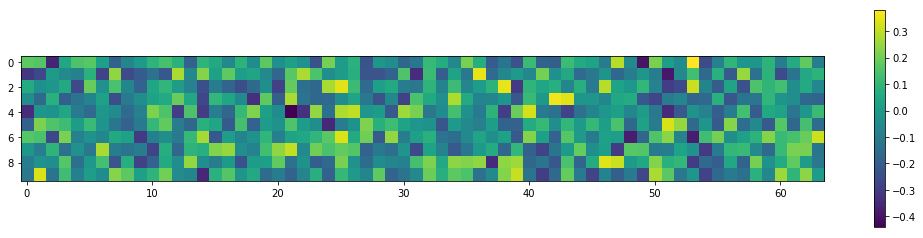

In [30]:
plt.figure(figsize=(18,4))
plt.tight_layout()
plt.imshow(origWeights[4].T)
plt.colorbar()

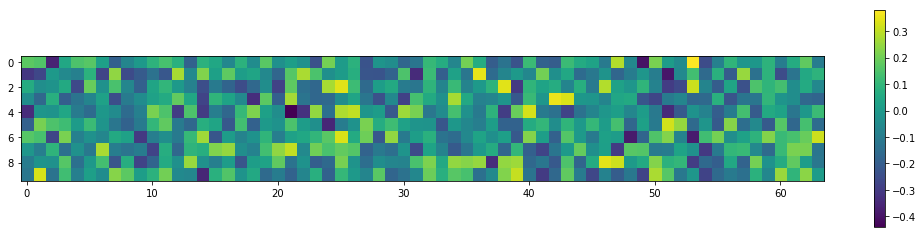

In [31]:
plt.figure(figsize=(18,4))
plt.tight_layout()
plt.imshow(modifiedWeights[4].T)
plt.colorbar()